In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error


def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

np.random.seed(7)



In [21]:
#Carrega o dataset
#international airline passengers problem with time step regression framing
dataframe = read_csv('https://telescopeinstorage.blob.core.windows.net/datasets/AirPassengers.csv', usecols=[1], engine='python')


df=arquivo = pd.read_csv('./solicitacoescredito.csv')
df=df.loc[df['valorAprovado']>0]
df['dataAprovado'] = np.where(df['status'] == 'AprovadoAnalista', df['dataAprovadoNivelAnalista'], df['dataAprovadoEmComite'])


df=df[['dataAprovado','valorAprovado']]
df['dataAprovado']=pd.to_datetime(pd.to_datetime(df['dataAprovado'],errors='coerce').dt.date)
df.head()
df.info()

df=df.groupby('dataAprovado',as_index = False)['valorAprovado'].sum()
df=df.sort('dataAprovado')
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7565 entries, 0 to 8961
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dataAprovado   7565 non-null   datetime64[ns]
 1   valorAprovado  7565 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 177.3 KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


AttributeError: 'DataFrame' object has no attribute 'sort'

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.0274
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 11/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 12/100
176/176 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 13/100


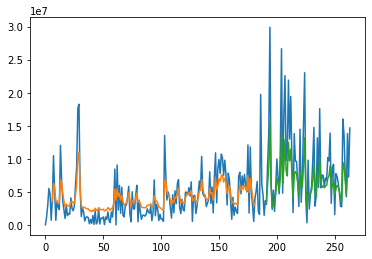

In [30]:


X = df.valorAprovado.values.reshape(-1, 1)
X = X.astype('float32')

#plt.plot(X)

#Normaliza o dataset
scaler = MinMaxScaler(feature_range=(0, 1))

#scaler = StandardScaler()
X = scaler.fit_transform(X)

# split into train and test sets
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size

train = X[0:train_size,:]
test =  X[train_size:len(X),:]

# quantidade de atrasos
look_back = 7

X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# reshape da entrada para ser [amostras, time steps, caracteristicas]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Cria e treina a rede LSTM
model = Sequential()
model.add(LSTM(30, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# PrediÃ§Ãµes
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Faz a transformaÃ§Ã£o inversa das prediÃ§Ãµes
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Prepara o vetor para plotagem do conjunto de treinamento
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back-1:len(trainPredict)+look_back-1, :] = trainPredict

# # Prepara o vetor para plotagem do conjunto das prediÃ§Ãµes
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(X)-2, :] = testPredict

# Plota o dataset, as prediÃ§Ãµes sobre o conjunto de treinamento e teste
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()